In [ ]:
!pip install geopandas

# Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.stats import randint
import pickle

ej_socio_data = pd.read_csv('/preprocessing/PFAS_Data.csv')

columns_to_use = ["N_D_MINOR_PER", "N_D_LESSHS_PER", "N_D_UNEMPLOYED_PER", "N_D_UNDER5_PER", "N_D_INCOME_PER", "N_D_OVER64_PER"]

# def clean(data):
#     # Fill missing values with median
#     cols = columns_to_use
#     for col in cols:
#         data[col].fillna(data[col].median(), inplace = True)
#         # data = data.dropna(subset=[col])
#     return data

#ej_socio_data = clean(ej_socio_data)

y = ej_socio_data["Industry Presence"]
X = ej_socio_data[columns_to_use]

In [ ]:
for col in columns_to_use:
    print(X.loc[X[col] == np.NaN])

Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []
Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []
Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []
Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []
Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []
Empty DataFrame
Columns: [N_D_MINOR_PER, N_D_LESSHS_PER, N_D_UNEMPLOYED_PER, N_D_UNDER5_PER, N_D_INCOME_PER, N_D_OVER64_PER]
Index: []


In [ ]:
# param_grid = {
#     'n_estimators': [100, 125, 150, 175],
#     'max_depth': [10, 12, 14, 16],
#     'min_samples_split': [8, 10, 12]
# }

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Fit the grid search object to the data
# # grid_search = GridSearchCV(rf, param_grid, cv=3, scoring = 'precision')
# # grid_search.fit(X, y)
# # best_rf = grid_search.best_estimator_
# # # Print the best hyperparameters
# # print('Best hyperparameters:', grid_search.best_params_)

# best_rf = RandomForestClassifier(max_depth=16, n_estimators=150, min_samples_split=12)

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # Fit the model to the training data
# best_rf.fit(X_train, y_train)

# # Load/Dump best_rf
# pickle.dump(best_rf, open('/analysis3/best_rf.sav', 'wb'))
best_rf = pickle.load(open('/analysis3/best_rf.sav', 'rb'))


y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7115072933549432
Precision: 0.7228590694538098
F1 Score: 0.7066578773895847


In [ ]:
ej_socio_data['Industry Prediction'] = best_rf.predict(ej_socio_data[columns_to_use])
ej_socio_data['Model Confidence'] = best_rf.predict_proba(X)[:, 1]

def check_model_accuracy(x1, x2):
    if x1 == 0 and x2 == 0:
        return 'TN'
    elif x1 == 0 and x2 == 1:
        return 'FP'
    elif x1 == 1 and x2 == 0:
        return 'FN'
    elif x1 == 1 and x2 == 1:
        return 'TP'

ej_socio_data['test_result'] = ej_socio_data.apply(lambda x: check_model_accuracy(x['Industry Presence'], x['Industry Prediction']), axis=1)

ej_socio_data.to_csv('/final_data/PFAS_FINAL_DATA.csv')

In [ ]:
predictions_df = ej_socio_data.loc[ej_socio_data['state_name'] != 'Puerto Rico']
predictions_df = predictions_df[["city", "state_name", "Latitude", "Longitude", "Industry Prediction", "Model Confidence"]]
predictions_df = predictions_df.rename({'Industry Prediction':'Suggestion Result'}, axis=1)
top_100_cities = predictions_df[predictions_df["Suggestion Result"] == 1].nlargest(100, "Model Confidence")
top_100_cities["Model Prediction"] = "Industries Present"
top_100_cities.to_csv('/final_data/PFAS_TESTING_SUGGESTIONS.csv')

# Finished Figures

In [ ]:
# results = grid_search.cv_results_
# param_values = {param: results['param_' + param].tolist() for param in param_grid.keys()}
# mean_test_score = results['mean_test_score'].tolist()


# if len(mean_test_score) != len(param_values[list(param_grid.keys())[0]]):
#     print("Error: Lengths of mean_test_score and param_values do not match.")
# else:
#     df = pd.DataFrame({**param_values, 'mean_test_score': mean_test_score})


#     df = df.sort_values(by='mean_test_score', ascending=False)


#     df.to_csv("/analysis3/Grid_Search.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_

feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance of Random Forest Classifier Inputs")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), ['National\nMinority\nPercentile', 'National\nUnemployment\nRate Percentile', 'National\nUnder Age 5\nPercentile', 'National\nOver Age 64\nPercentile', 'National\nLess than\nHigh School\nEducation\nPercentile', 'National\nLow Income\nPercentile'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()

plt.savefig("/analysis3/Figure3.png")
plt.show()

NameError: name 'best_rf' is not defined

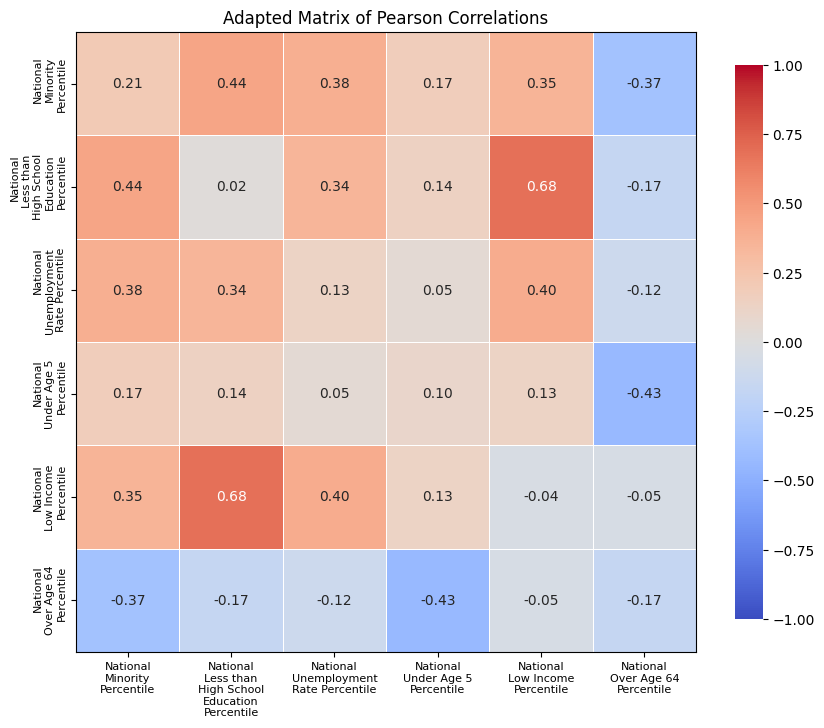

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have defined the list of input variables in 'columns_to_use'
# # and the DataFrame containing the input variables in 'X'

# ej_socio_data = pd.read_csv('/preprocessing/PFAS_Data.csv')
# columns_to_use = ["N_D_MINOR_PER", "N_D_LESSHS_PER", "N_D_UNEMPLOYED_PER", "N_D_UNDER5_PER", "N_D_INCOME_PER", "N_D_OVER64_PER"]

# y = ej_socio_data["Industry Presence"]
# X = ej_socio_data[columns_to_use]
# # Calculate the correlation matrix for all X variables
# correlation_matrix = X.corr(method="pearson")  # You can use "spearman" or "kendall" as well

# # Define the feature importance vector
# industry_corr = {
#     'N_D_MINOR_PER': 0.21,
#     'N_D_UNEMPLOYED_PER': 0.13,
#     'N_D_UNDER5_PER': 0.10,
#     'N_D_OVER64_PER': -0.17,
#     'N_D_LESSHS_PER': 0.02,
#     'N_D_INCOME_PER': -0.04
# }

# # Create a custom color map
# custom_cmap = sns.color_palette("coolwarm", as_cmap=True)

# # Set diagonal elements to the corresponding feature importance values
# for feature, industry_corr_value in industry_corr.items():
#     correlation_matrix.loc[feature, feature] = industry_corr_value


# # Create a heatmap for the updated correlation matrix with the color bar
# new_labels = {
#     'N_D_MINOR_PER': 'National\nMinority\nPercentile',
#     'N_D_UNEMPLOYED_PER': 'National\nUnemployment\nRate Percentile',
#     'N_D_UNDER5_PER': 'National\nUnder Age 5\nPercentile',
#     'N_D_OVER64_PER': 'National\nOver Age 64\nPercentile',
#     'N_D_LESSHS_PER': 'National\nLess than\nHigh School\nEducation\nPercentile',
#     'N_D_INCOME_PER': 'National\nLow Income\nPercentile'
# }

# # Create a heatmap for the updated correlation matrix with the color bar
# plt.figure(figsize=(10, 9))  # Adjust the figure size as needed (larger size)

# # Modify the colormap to set diagonal cells to white
# ax = sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5,
#                  xticklabels=[new_labels[label] for label in columns_to_use],
#                  yticklabels=[new_labels[label] for label in columns_to_use],
#                  cbar=True, cbar_kws={"orientation": "vertical", "shrink": 0.8}, square=True)



# # Set the text color of diagonal cells to black
# # for i in range(len(columns_to_use)):
# #     ax.text(i + 0.5, i + 0.5, str(round(correlation_matrix.iloc[i, i], 2)),
# #             ha='center', va='center', color='black')

# # Set linewidths and line color for the diagonal cells
# for _, spine in ax.spines.items():
#     spine.set_visible(True)
#     if spine.spine_type == 'right':
#         spine.set_color('black')  # Set right spine to black
#     elif spine.spine_type == 'top':
#         spine.set_color('black')  # Set top spine to black

# # Show the color bar separately
# cax = plt.gcf().axes[-1]
# cax.tick_params(labelsize=10)

# # Set x-axis labels at the top and reduce font size
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)


# # Reduce font size for y-axis labels
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# plt.title("Adapted Matrix of Pearson Correlations")
# plt.savefig("/analysis3/PearsonCorrelationMatrix.png")
# plt.show()

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

best_rf = pickle.load(open('/analysis3/best_rf.sav', 'rb'))

# Create a figure to hold the plots
fig = plt.figure(figsize=(12, 18))

grid=(3,2)
ax_0_0 = plt.subplot2grid(grid, (0, 0))
ax_0_1 = plt.subplot2grid(grid, (0, 1))
ax_1_0 = plt.subplot2grid(grid, (1, 0))
ax_1_1 = plt.subplot2grid(grid, (1, 1))
ax_2_0 = plt.subplot2grid(grid, (2, 0))
ax_2_1 = plt.subplot2grid(grid, (2, 1))


def plot_pdp(model, data, col, colname, ax):
    print("plotting " + str(colname))
    display = PartialDependenceDisplay.from_estimator(model, data, ax=ax, features=[col])
    print("done plotting " + str(colname))
    ax.set_title(f"PDP of {colname}")
    ax.set_xlabel(str(colname))
    ax.set_ylim([0, 1])
    plt.ylim([0,1])

plot_pdp(best_rf, X, 'N_D_MINOR_PER', "National Minority Percentile", ax_0_0)
plot_pdp(best_rf, X, 'N_D_UNEMPLOYED_PER', "National Unemployment Rate Percentile", ax_0_1)
plot_pdp(best_rf, X, 'N_D_LESSHS_PER', "National Less than High School\n Education Percentile", ax_2_1)
plot_pdp(best_rf, X, 'N_D_UNDER5_PER', "National Under Age 5 Percentile", ax_1_0)
plot_pdp(best_rf, X, 'N_D_INCOME_PER', "National Low Income Percentile", ax_2_0)
plot_pdp(best_rf, X, 'N_D_OVER64_PER', "National Over Age 64 Percentile", ax_1_1)

ax_0_0.text(-0.1, 1.1, '4a', fontsize=20, fontweight='bold')
ax_0_1.text(-0.1, 1.1, '4b', fontsize=20, fontweight='bold')
ax_1_0.text(-0.1, 1.1, '4c', fontsize=20, fontweight='bold')
ax_1_1.text(-0.1, 1.1, '4d', fontsize=20, fontweight='bold')
ax_2_0.text(-0.1, 1.1, '4e', fontsize=20, fontweight='bold')
ax_2_1.text(-0.1, 1.1, '4f', fontsize=20, fontweight='bold')

plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.savefig("/analysis3/new_PDP.png")
plt.show()


plotting National Minority Percentile


KeyboardInterrupt: ignored

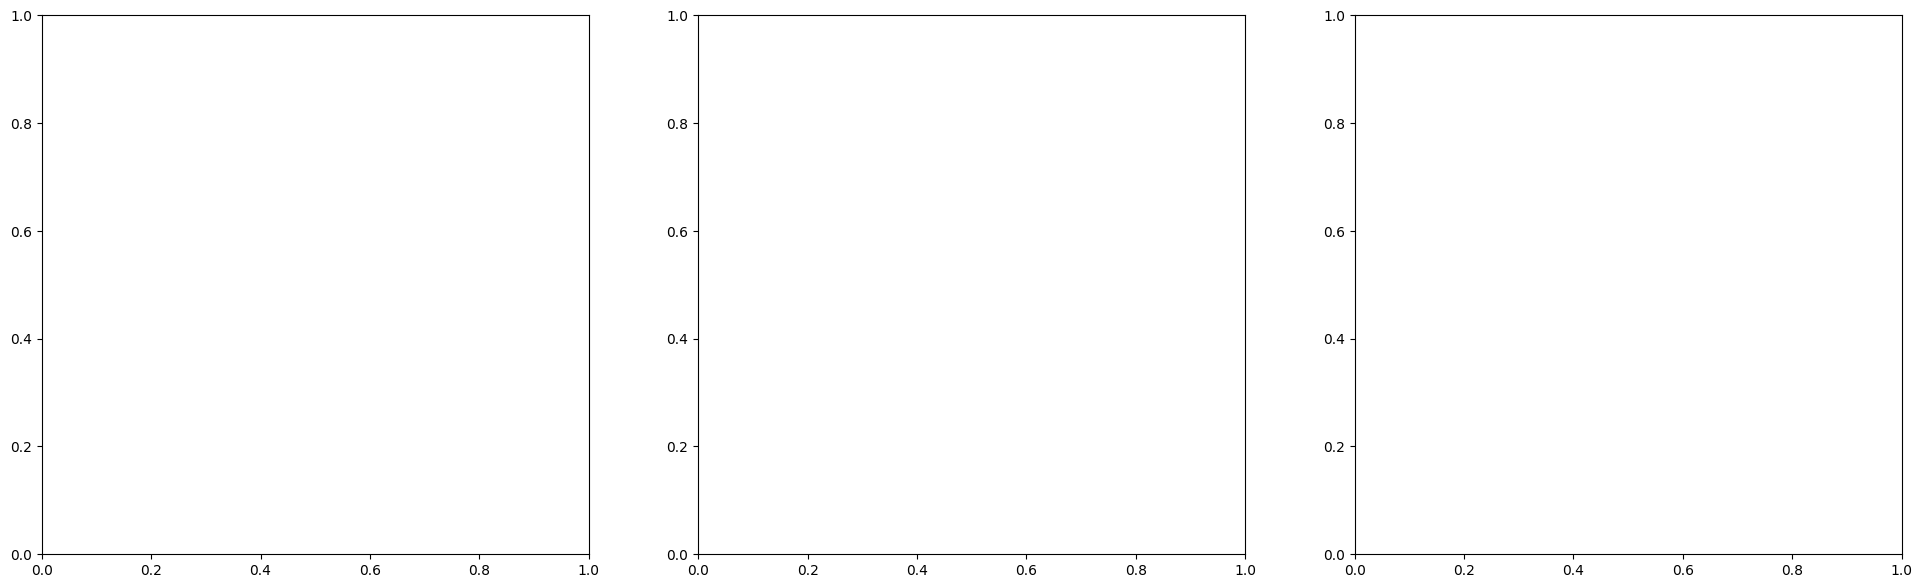

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

best_rf = pickle.load(open('/analysis3/best_rf.sav', 'rb'))

# Create a figure to hold the plots
fig = plt.figure(figsize=(24, 7))

grid=(1,3)
ax_0_0 = plt.subplot2grid(grid, (0, 0))
ax_0_1 = plt.subplot2grid(grid, (0, 1))
ax_0_2 = plt.subplot2grid(grid, (0, 2))



def plot_pdp(model, data, col, colname, ax):
    print("plotting " + str(colname))
    display = PartialDependenceDisplay.from_estimator(model, data, ax=ax, features=[col])
    print("done plotting " + str(colname))
    ax.set_title(f"PDP of {colname}")
    ax.set_xlabel(str(colname))
    ax.set_ylim([0, 1])
    plt.ylim([0,1])

plot_pdp(best_rf, X, 'N_D_MINOR_PER', "National Minority Percentile", ax_0_0)
plot_pdp(best_rf, X, 'N_D_UNEMPLOYED_PER', "National Unemployment Rate Percentile", ax_0_1)
plot_pdp(best_rf, X, 'N_D_UNDER5_PER', "National Under Age 5 Percentile", ax_0_2)

ax_0_0.text(-0.1, 1.1, '4a', fontsize=20, fontweight='bold')
ax_0_1.text(-0.1, 1.1, '4b', fontsize=20, fontweight='bold')
ax_0_2.text(-0.1, 1.1, '4c', fontsize=20, fontweight='bold')

plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.savefig("/analysis3/top_3_PDP.png")
plt.show()


plotting National Over Age 64 Percentile
done plotting National Over Age 64 Percentile
plotting National Low Income Rate Percentile
done plotting National Low Income Rate Percentile
plotting National Less than Highschool
 Education Percentile
done plotting National Less than Highschool
 Education Percentile


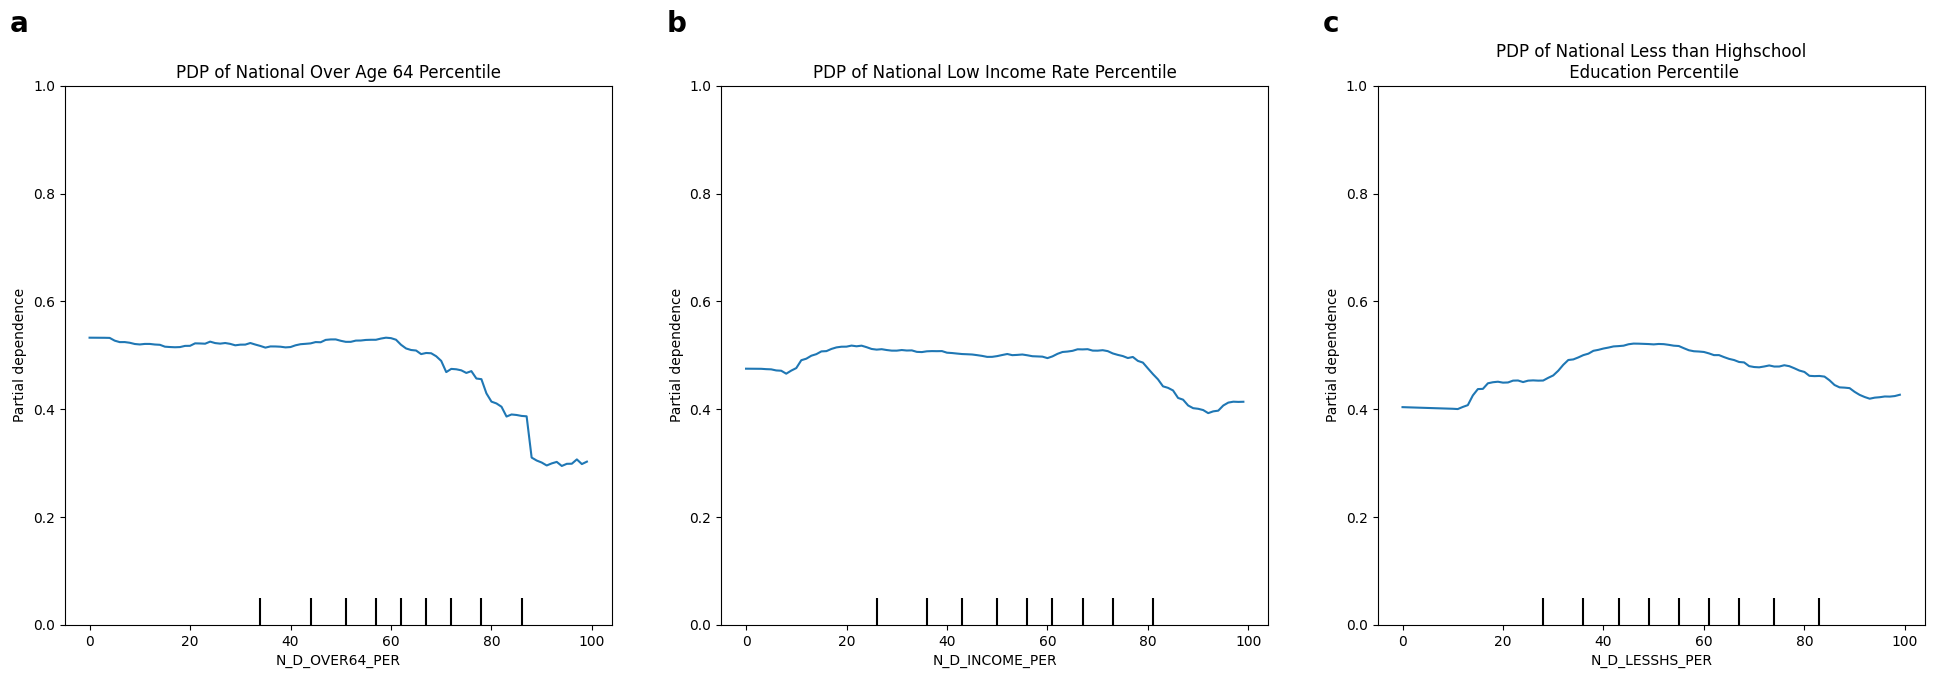

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

best_rf = pickle.load(open('/analysis3/best_rf.sav', 'rb'))

# Create a figure to hold the plots
fig = plt.figure(figsize=(24, 7))

grid=(1,3)
ax_0_0 = plt.subplot2grid(grid, (0, 0))
ax_0_1 = plt.subplot2grid(grid, (0, 1))
ax_0_2 = plt.subplot2grid(grid, (0, 2))



def plot_pdp(model, data, col, colname, ax):
    print("plotting " + str(colname))
    display = PartialDependenceDisplay.from_estimator(model, data, ax=ax, features=[col])
    print("done plotting " + str(colname))
    ax.set_title(f"PDP of {colname}")
    ax.set_xlabel(str(colname))
    ax.set_ylim([0, 1])
    plt.ylim([0,1])

plot_pdp(best_rf, X, 'N_D_OVER64_PER', "National Over Age 64 Percentile", ax_0_0)
plot_pdp(best_rf, X, 'N_D_INCOME_PER', "National Low Income Rate Percentile", ax_0_1)
plot_pdp(best_rf, X, 'N_D_LESSHS_PER', "National Less than Highschool\n Education Percentile", ax_0_2)

ax_0_0.text(-0.1, 1.1, 'a', fontsize=20, fontweight='bold')
ax_0_1.text(-0.1, 1.1, 'b', fontsize=20, fontweight='bold')
ax_0_2.text(-0.1, 1.1, 'c', fontsize=20, fontweight='bold')

plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.savefig("/analysis3/appendix_PDP.png")
plt.show()


# Model Deployment

KeyboardInterrupt: ignored

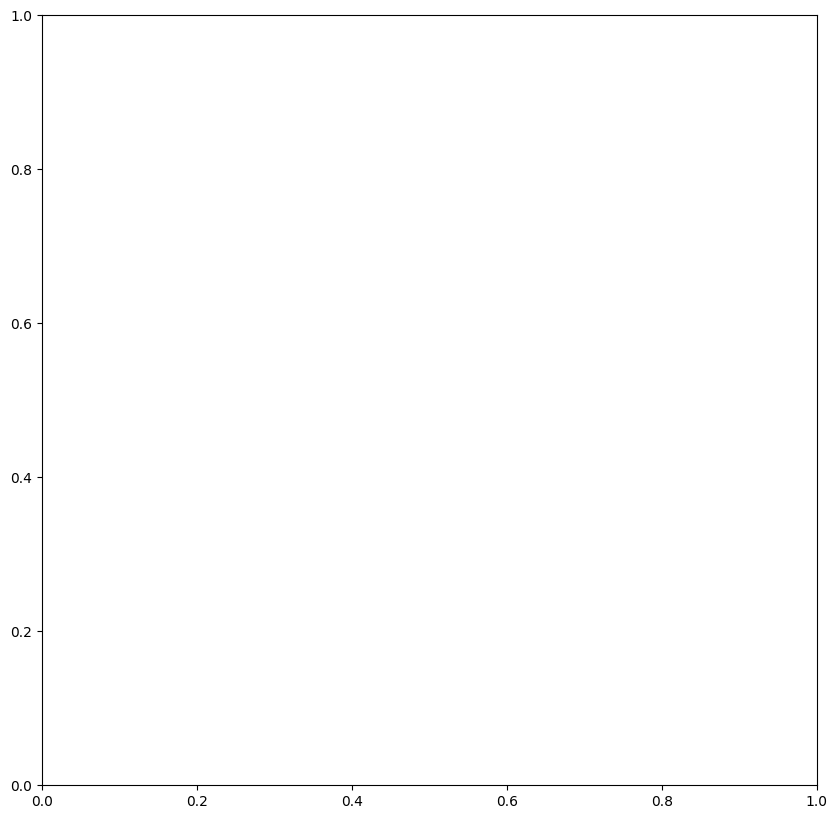

In [ ]:
#FIGURE 1D

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

best_rf = pickle.load(open('/analysis3/best_rf.sav', 'rb'))

ej_socio_data = pd.read_csv('/final_data/PFAS_FINAL_DATA.csv')
states = gpd.read_file('/preprocessing/tl_2021/tl_2021_us_state.shp')

def prepare_df_agg(df, column):
    df = df.sort_values(by=[column], ascending=False)
    df_agg = df.groupby(['city', 'Latitude', 'Longitude']).max()[column].reset_index()
    return df_agg

def prepare_geo_df(df, column):
    df_agg = prepare_df_agg(df, column)
    geo_df = gpd.GeoDataFrame(df_agg, geometry=gpd.points_from_xy(df_agg.Longitude, df_agg.Latitude))
    return geo_df

def plot_industries_column(geo_df, hex_color, column):
    fig, ax = plt.subplots(figsize=(10, 10))
    geo_df = prepare_geo_df(geo_df, column)
    states.plot(ax=ax, figsize=(10, 10), color=hex_color, linewidth=1, aspect=1)

    # Plot points with Industry Presence = 1 as light red
    geo_df_values_1 = geo_df.loc[geo_df[column] == 1]
    plt.scatter(geo_df_values_1['Longitude'], geo_df_values_1['Latitude'], s=0.7, c='#ff7f7f', zorder=2)

    # Plot points with Industry Presence = 0 as light green
    geo_df_values_0 = geo_df.loc[geo_df[column] == 0]
    plt.scatter(geo_df_values_0['Longitude'], geo_df_values_0['Latitude'], s=0.7, c='#a8ffa8', zorder=1)

    if column == 'Industry Presence':
        red_patch_label = 'At Least One Industry'
        green_patch_label = 'No Industries'
        plot_title = 'PFAS Industry Presence near Major Cities in the United States'
        file_path2 = f"/analysis1/Industry_Presence.png"
    elif column == 'Industry Prediction':
        red_patch_label = 'Predicted At Least One Industry'
        green_patch_label = 'Predicted No Industries'
        plot_title = 'Predicted PFAS Industry Presence near Major Cities in the United States'
        file_path1 = f"/content/drive/MyDrive/pfas_python_files/analysis1/Industry_Prediction.png"

    red_patch = mpatches.Patch(color='#ff7f7f', label=red_patch_label)
    green_patch = mpatches.Patch(color='#a8ffa8', label=green_patch_label)

    # Plot legend
    plt.legend(handles=[red_patch, green_patch], loc='lower right')

    plt.ylim([24.52, 49.38])
    plt.xlim([-124.77, -66.95])


    plt.xlabel("Longitude", size=12)
    plt.ylabel("Latitude", size=12)
    ax.set_title(plot_title)


    # Save the plot as a PNG file
    plt.savefig(file_path1)

    if column == 'Industry Presence':
        plt.savefig(file_path2)

    plt.show()

    return fig

industries_presence = plot_industries_column(ej_socio_data, '#D3D3D3', 'Industry Presence')
industries_prediction = plot_industries_column(ej_socio_data, '#D3D3D3', 'Industry Prediction')

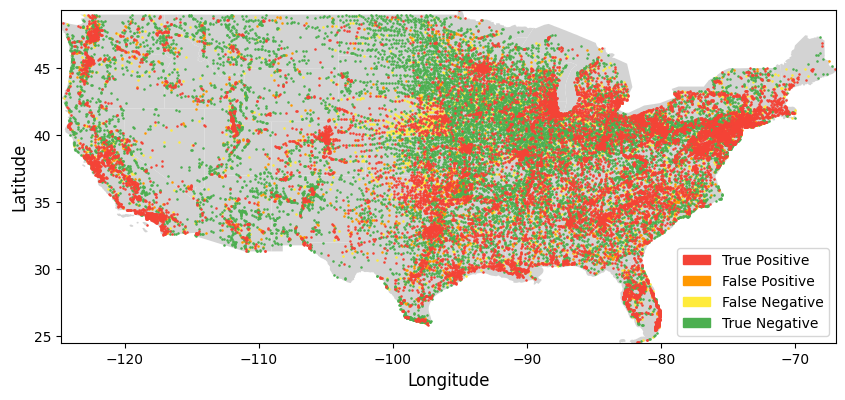

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

states = gpd.read_file('/preprocessing/tl_2021/tl_2021_us_state.shp')

def prepare_df_agg(df, column):
    df = df.sort_values(by=[column], ascending=False)
    df_agg = df.groupby(['city', 'Latitude', 'Longitude']).max()[column].reset_index()
    return df_agg

def prepare_geo_df(df, column):
    df_agg = prepare_df_agg(df, column)
    geo_df = gpd.GeoDataFrame(df_agg, geometry=gpd.points_from_xy(df_agg.Longitude, df_agg.Latitude))
    return geo_df

def plot_model_accuracy(geo_df, hex_color, plot_title):
    fig, ax = plt.subplots(figsize=(10, 10))
    geo_df = prepare_geo_df(geo_df, 'test_result')
    states.plot(ax=ax, figsize=(10, 10), color=hex_color, linewidth=1, aspect=1)


    tp_color = '#F44336'
    fp_color = '#FF9800'
    fn_color = '#FFEB3B'
    tn_color = '#4CAF50'


    geo_df_values_tp = geo_df.loc[geo_df['test_result'] == 'TP']
    plt.scatter(geo_df_values_tp['Longitude'], geo_df_values_tp['Latitude'], s=0.7, c=tp_color, zorder=2)

    geo_df_values_fp = geo_df.loc[geo_df['test_result'] == 'FP']
    plt.scatter(geo_df_values_fp['Longitude'], geo_df_values_fp['Latitude'], s=0.7, c=fp_color, zorder=1)

    geo_df_values_fn = geo_df.loc[geo_df['test_result'] == 'FN']
    plt.scatter(geo_df_values_fn['Longitude'], geo_df_values_fn['Latitude'], s=0.7, c=fn_color, zorder=1)

    geo_df_values_tn = geo_df.loc[geo_df['test_result'] == 'TN']
    plt.scatter(geo_df_values_tn['Longitude'], geo_df_values_tn['Latitude'], s=0.7, c=tn_color, zorder=1)


    tp_patch = mpatches.Patch(color=tp_color, label='True Positive')
    fp_patch = mpatches.Patch(color=fp_color, label='False Positive')
    fn_patch = mpatches.Patch(color=fn_color, label='False Negative')
    tn_patch = mpatches.Patch(color=tn_color, label='True Negative')

    # Plot legend
    plt.legend(handles=[tp_patch, fp_patch, fn_patch, tn_patch], loc='lower right')

    plt.ylim([24.52, 49.38])
    plt.xlim([-124.77, -66.95])


    plt.xlabel("Longitude", size=12)
    plt.ylabel("Latitude", size=12)
    ax.set_title(plot_title)

    file_path = f"/analysis1/Model_Accuracy_Map.png"

    # Save the plot as a PNG file
    plt.savefig(file_path)
    plt.show()

    return fig


model_accuracy_map = plot_model_accuracy(ej_socio_data, '#D3D3D3')

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

industries = pd.read_csv("/preprocessing/industries.csv", encoding = 'unicode_escape', engine ='python')
states = gpd.read_file('/preprocessing/tl_2021/tl_2021_us_state.shp')
pfas_stats = pd.read_csv('/preprocessing/PFAS_Data.csv')

testing = pd.read_csv("/preprocessing/testing_sites.csv")
testing = testing[['location','latitude','longitude','value']]
testing.to_csv("/preprocessing/testing_sites.csv")
testing.rename(columns = {'latitude':"Latitude", 'longitude':"Longitude"}, inplace=True)

industries['Longitude'] = pd.to_numeric(industries['Longitude'], errors='coerce')
industries['Latitude'] = pd.to_numeric(industries['Latitude'], errors='coerce')

testing['Longitude'] = pd.to_numeric(testing['Longitude'], errors='coerce')
testing['Latitude'] = pd.to_numeric(testing['Latitude'], errors='coerce')

def prepare_df_agg(df, column):
    df = df.sort_values(by=[column], ascending=False)
    df_agg = df.groupby(['city', 'Latitude', 'Longitude']).max()[column].reset_index()
    return df_agg

def prepare_geo_df(df, column):
    df_agg = prepare_df_agg(df, column)
    geo_df = gpd.GeoDataFrame(df_agg, geometry=gpd.points_from_xy(df_agg.Longitude, df_agg.Latitude))
    return geo_df

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

geo_df = ej_socio_data.copy()
states.plot(ax=axs[0][2], figsize=(10, 10), color="#D3D3D3", linewidth=1, aspect=1)
geo_df_values = geo_df.loc[(geo_df['Industry Count'] < 25)]
geo_df_values = geo_df_values.loc[(geo_df_values['Industry Count'] > 0)]
scatter = axs[0][2].scatter(geo_df_values['Longitude'], geo_df_values['Latitude'], s=0.7, c=np.log2(geo_df_values['Industry Count']), cmap='Blues', zorder=9)
cbar = plt.colorbar(scatter, ax=axs[0][2], label="Quantity of Proximal PFAS Industries", extend='max', shrink=0.5)
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['0', '$1^2$', '$2^2$', '$3^2$', '$4^2$'])
geo_df_values_higher = geo_df.loc[geo_df['Industry Count'] > 25]
axs[0][2].scatter(geo_df_values_higher['Longitude'], geo_df_values_higher['Latitude'], s=0.7, c='#042757', zorder=10)
geo_df_zero = geo_df.loc[geo_df['Industry Count'] == 0]
axs[0][2].scatter(geo_df_zero['Longitude'], geo_df_zero['Latitude'], s=0.5, c='#f5f9ff' , zorder=1)
axs[0][2].set_ylim([24.52, 49.38])
axs[0][2].set_xlim([-124.77, -66.95])
axs[0][2].set_xlabel("Longitude", size=12)
axs[0][2].set_ylabel("Latitude", size=12)
axs[0][2].set_title("The Quantity of PFAS Industries\nnear Major Cities in the United States")

states.plot(ax=axs[0][1], facecolor='#D3D3D3')
axs[0][1].scatter(industries['Longitude'], industries['Latitude'], color='#2f92d6', s=0.7)
axs[0][1].set_title("PFAS Industries in the United States")
axs[0][1].set_xlabel("Longitude")
axs[0][1].set_ylabel("Latitude")
axs[0][1].set_xlim([-124.77, -66.95])
axs[0][1].set_ylim([24.52, 49.38])

states.plot(ax=axs[0][0], facecolor='#D3D3D3')
axs[0][0].scatter(testing['Longitude'], testing['Latitude'], color='#2f92d6', s=0.7)
axs[0][0].set_title("PFAS Testing Sites in the United States")
axs[0][0].set_xlabel("Longitude")
axs[0][0].set_ylabel("Latitude")
axs[0][0].set_xlim([-124.77, -66.95])
axs[0][0].set_ylim([24.52, 49.38])

geo_df = ej_socio_data.copy()
geo_df = prepare_geo_df(geo_df, 'Industry Presence')
states.plot(ax=axs[1][0], figsize=(10, 10), color="#D3D3D3", linewidth=1, aspect=1)
geo_df_values_1 = geo_df.loc[geo_df['Industry Presence'] == 1]
axs[1][0].scatter(geo_df_values_1['Longitude'], geo_df_values_1['Latitude'], s=0.7, c='#ff7f7f', zorder=2)
geo_df_values_0 = geo_df.loc[geo_df['Industry Presence'] == 0]
axs[1][0].scatter(geo_df_values_0['Longitude'], geo_df_values_0['Latitude'], s=0.7, c='#a8ffa8', zorder=1)
red_patch = mpatches.Patch(color='#ff7f7f', label='At Least One Industry')
green_patch = mpatches.Patch(color='#a8ffa8', label='No Industries')
axs[1][0].legend(handles=[red_patch, green_patch], loc='lower right')
axs[1][0].set_ylim([24.52, 49.38])
axs[1][0].set_xlim([-124.77, -66.95])
axs[1][0].set_xlabel("Longitude", size=12)
axs[1][0].set_ylabel("Latitude", size=12)
axs[1][0].set_title("PFAS Industry Presence near Major Cities in the United States")

geo_df = ej_socio_data.copy()
geo_df = prepare_geo_df(geo_df, 'Industry Prediction')
states.plot(ax=axs[1][1], figsize=(10, 10), color="#D3D3D3", linewidth=1, aspect=1)
geo_df_values_1 = geo_df.loc[geo_df['Industry Prediction'] == 1]
axs[1][1].scatter(geo_df_values_1['Longitude'], geo_df_values_1['Latitude'], s=0.7, c='#ff7f7f', zorder=2)
geo_df_values_0 = geo_df.loc[geo_df['Industry Prediction'] == 0]
axs[1][1].scatter(geo_df_values_0['Longitude'], geo_df_values_0['Latitude'], s=0.7, c='#a8ffa8', zorder=1)
red_patch = mpatches.Patch(color='#ff7f7f', label='Predicted At Least One Industry')
green_patch = mpatches.Patch(color='#a8ffa8', label='Predicted No Industries')
axs[1][1].legend(handles=[red_patch, green_patch], loc='lower right')
axs[1][1].set_ylim([24.52, 49.38])
axs[1][1].set_xlim([-124.77, -66.95])
axs[1][1].set_xlabel("Longitude", size=12)
axs[1][1].set_ylabel("Latitude", size=12)
axs[1][1].set_title("Predicted PFAS Industry Presence near Major Cities in the United States")

geo_df = ej_socio_data.copy()
geo_df = prepare_geo_df(geo_df, 'test_result')
states.plot(ax=axs[1][2], figsize=(10, 10), color="#D3D3D3", linewidth=1, aspect=1)
tp_color = '#F44336'
fp_color = '#FF9800'
fn_color = '#FFEB3B'
tn_color = '#4CAF50'
geo_df_values_tp = geo_df.loc[geo_df['test_result'] == 'TP']
axs[1][2].scatter(geo_df_values_tp['Longitude'], geo_df_values_tp['Latitude'], s=0.7, c=tp_color, zorder=2)
geo_df_values_fp = geo_df.loc[geo_df['test_result'] == 'FP']
axs[1][2].scatter(geo_df_values_fp['Longitude'], geo_df_values_fp['Latitude'], s=0.7, c=fp_color, zorder=1)
geo_df_values_fn = geo_df.loc[geo_df['test_result'] == 'FN']
axs[1][2].scatter(geo_df_values_fn['Longitude'], geo_df_values_fn['Latitude'], s=0.7, c=fn_color, zorder=1)
geo_df_values_tn = geo_df.loc[geo_df['test_result'] == 'TN']
axs[1][2].scatter(geo_df_values_tn['Longitude'], geo_df_values_tn['Latitude'], s=0.7, c=tn_color, zorder=1)
tp_patch = mpatches.Patch(color=tp_color, label='True Positive')
fp_patch = mpatches.Patch(color=fp_color, label='False Positive')
fn_patch = mpatches.Patch(color=fn_color, label='False Negative')
tn_patch = mpatches.Patch(color=tn_color, label='True Negative')
axs[1][2].legend(handles=[tp_patch, fp_patch, fn_patch, tn_patch], loc='lower right')
axs[1][2].set_ylim([24.52, 49.38])
axs[1][2].set_xlim([-124.77, -66.95])
axs[1][2].set_xlabel("Longitude", size=12)
axs[1][2].set_ylabel("Latitude", size=12)
axs[1][2].set_title("Model Accuracy for Predicted PFAS Industry Presence\nnear Major Cities in the United States")


axs[0][0].text(-128, 52, '1a', fontsize=20, fontweight='bold')
axs[0][1].text(-128, 52, '1b', fontsize=20, fontweight='bold')
axs[0][2].text(-128, 52, '1c', fontsize=20, fontweight='bold')
axs[1][0].text(-128, 52, '1d', fontsize=20, fontweight='bold')
axs[1][1].text(-128, 52, '1e', fontsize=20, fontweight='bold')
axs[1][2].text(-128, 52, '1f', fontsize=20, fontweight='bold')

plt.tight_layout()

file_path = f"/analysis1/Figure1.png"
plt.savefig(file_path)
fig

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
top_1000_cities = pd.read_csv('/final_data/PFAS_Testing_Suggestions.csv')

    Unnamed: 0             city  state_name  Latitude  Longitude  \
0        12442        Edmonston    Maryland   38.9502   -76.9332   
1         5571           El Rio  California   34.2453  -119.1568   
2         2413  North Bay Shore    New York   40.7602   -73.2617   
3          766        Brentwood    New York   40.7839   -73.2522   
4         4497   Valley Cottage    New York   41.1162   -73.9433   
..         ...              ...         ...       ...        ...   
95        9100     East Norwich    New York   40.8495   -73.5288   
96         614           Upland  California   34.1178  -117.6604   
97        3236  Ridgefield Park  New Jersey   40.8543   -74.0201   
98        2527           Iselin  New Jersey   40.5697   -74.3172   
99        4131      Charter Oak  California   34.1025  -117.8564   

    Suggestion Result  Model Confidence    Model Prediction  
0                   1          0.953128  Industries Present  
1                   1          0.948407  Industries Present

In [ ]:
predictions_df = ej_socio_data.loc[ej_socio_data['state_name'] != 'Puerto Rico']
predictions_df = predictions_df[["city", "state_name", "Latitude", "Longitude", "Industry Prediction", "Model Confidence"]]
predictions_df = predictions_df.rename({'Industry Prediction':'Suggestion Result'}, axis=1)
top_1000_cities = predictions_df[predictions_df["Suggestion Result"] == 1].nlargest(1000, "Model Confidence")
top_1000_cities["Model Prediction"] = "Industries Present"
top_1000_cities.to_csv('/final_data/PFAS_Testing_Suggestions.csv')

In [ ]:
top_1000_cities = pd.read_csv('/final_data/PFAS_Testing_Suggestions.csv')

ax_color = "#ff7f7f"
ax_title = "Random Forest Recommendations for Prioritizing PFAS Testing in the United States"
file_path = f"/analysis4/PFAS_Testing_Suggestions_Map.png"

fig, ax = plt.subplots(figsize=(10, 10))
states.plot(ax=ax, facecolor='#D3D3D3')
ax.scatter(top_1000_cities['Longitude'], top_100_cities['Latitude'], color=ax_color, s=20)
ax.set_title(ax_title)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim([-124.77, -66.95])
ax.set_ylim([24.52, 49.38])

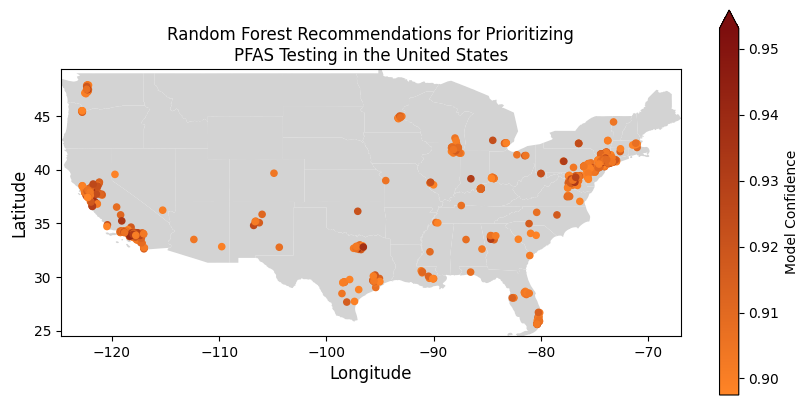

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

cmap_bounds = [0.0, 1.0]
#cmap_colors = ['#E57373', '#B71C1C']
# cmap_colors = ['#FFA726', '#B71C1C']
cmap_colors = ['#ff8426', '#7d0e0e']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomCmap", list(zip(cmap_bounds, cmap_colors)))
# normalize = mcolors.Normalize(vmin=0.0, vmax=1.0)

geo_df = top_1000_cities

fig, ax = plt.subplots(figsize=(10, 10))
geo_df = prepare_geo_df(geo_df, 'Model Confidence')

states.plot(ax=ax, figsize=(10, 10), color='#D3D3D3', linewidth=1, aspect=1)


geo_df_values = geo_df.loc[(geo_df['Model Confidence'] < 25)]
geo_df_values = geo_df_values.loc[(geo_df_values['Model Confidence'] > 0)]
plt.scatter(geo_df_values['Longitude'], geo_df_values['Latitude'], s=20, c=geo_df_values['Model Confidence'], cmap=custom_cmap, zorder=9)


cbar = plt.colorbar(label="Model Confidence", extend='max', shrink=0.5)
# cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
# cbar.set_ticklabels(['0', '$1^2$', '$2^2$', '$3^2$', '$4^2$'])


geo_df_values_higher = geo_df.loc[geo_df['Model Confidence'] > 25]
plt.scatter(geo_df_values_higher['Longitude'], geo_df_values_higher['Latitude'], s=0.7, c='#042757', zorder=10)

geo_df_zero = geo_df.loc[geo_df['Model Confidence'] == 0]
plt.scatter(geo_df_zero['Longitude'], geo_df_zero['Latitude'], s=0.5, c='#f5f9ff' , zorder=1)

plt.ylim([24.52, 49.38])
plt.xlim([-124.77, -66.95])


plt.xlabel("Longitude", size=12)
plt.ylabel("Latitude", size=12)
plt.title("Random Forest Recommendations for Prioritizing\nPFAS Testing in the United States")


file_path = f"/analysis4/PFAS_Testing_Suggestions_Map.png"

# Save the plot as a PNG file
plt.savefig(file_path)
plt.show()

# SHAP Model

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# best_rf = RandomForestClassifier(max_depth=16, n_estimators=150, min_samples_split=12)
# best_rf.fit(X, y)
# pickle.dump(best_rf, open('/analysis4/shap_best_rf.sav', 'wb'))
best_rf = pickle.load(open('/analysis4/shap_best_rf.sav', 'rb'))

In [ ]:
# import shap
# shap_columns = [f"SHAP_{col}" for col in columns_to_use]

# print("Started SHAP Anlysis")
# # Perform SHAP analysis
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X)

# # Append the SHAP values to the original DataFrame
# ej_socio_data[shap_columns] = pd.DataFrame(data=shap_values[1], columns=shap_columns)

# # Print the updated DataFrame with SHAP values
# print(ej_socio_data)

# # Save the DataFrame to a CSV file (optional)
# ej_socio_data.to_csv("/preprocessing/PFAS_SHAP_Data.csv", index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
shap_features = ['National\nMinority\nPercentile', 'National Less than\nHigh School Education\nPercentile', 'National\nUnemployment\nRate Percentile', 'National Under\nAge 5 Percentile', 'National\nLow Income\nPercentile', 'National Over\nAge 64 Percentile']
shap.summary_plot(shap_values[1], X, plot_size=0.75, feature_names=shap_features, show=False)
# ax.text(-0.825, 5.5, '4a', fontsize=20, fontweight='bold')
plt.savefig("/analysis4/SHAP_summary_plot.png")
# Show the plot
plt.show()

In [ ]:
# import shap
# def plot_decision_tree(expected, shap_array, X_value, skip_int, feature_name_list):
#     #starting at row 1 and skipping every skip_int rows, for ex. if skip_int = 8, we'll keep row 1, 9, 17, etc.. but not 0, 2-8, 10-16, etc...
#     fig, ax = plt.subplots(figsize=(10, 8))
#     if skip_int != 1:
#         test_shap = shap_array[1::skip_int]
#         test_expected = expected
#         test_X = np.array(X)[1::skip_int]
#     else:
#         test_shap = shap_array.copy()
#         test_expected = expected
#         test_X = np.array(X)
#     shap.decision_plot(test_expected, test_shap, test_X, feature_names=feature_name_list, auto_size_plot=False, ignore_warnings=True, show=False)
#     if skip_int != 1:
#         plt.savefig("/analysis4/SHAP_decision_plot_with_" + str(len(test_X)) + "_decisions.png")
#     else:
#         plt.savefig("/analysis4/SHAP_decision_plot_with_all_decisions.png")
#     plt.show()
#     print("Plotting " + str(len(test_X)) + " decisions")

# plot_decision_tree(explainer.expected_value[1], shap_values[1], X, 1, shap_features)

,Unnamed: 0.1,Unnamed: 0,city,state_name,Latitude,Longitude,Industry Count,Industry Presence,population,density,...,N_D_LING_PER,N_D_LESSHS_PER,N_D_UNDER5_PER,N_D_OVER64_PER,stateAbbr,stateName,epaRegion,totalPop,NUM_NPL,NUM_TSDF
0,0,0,New York,New York,40.6943,-73.9249,105,1,18972871,10768.2,...,82.0,74.0,67.0,33.0,NY,NEW YORK,2.0,1029047.0,3.0,24.0
1,1,1,Los Angeles,California,34.1141,-118.4068,7,1,12121244,3267.6,...,70.0,26.0,42.0,62.0,CA,CALIFORNIA,9.0,92772.0,0.0,2.0
2,2,2,Chicago,Illinois,41.8375,-87.6866,136,1,8595181,4576.6,...,93.0,90.0,61.0,33.0,IL,ILLINOIS,5.0,301861.0,0.0,16.0
3,3,3,Miami,Florida,25.7840,-80.2101,13,1,5711945,4945.7,...,96.0,85.0,53.0,51.0,FL,FLORIDA,4.0,299596.0,0.0,18.0
4,4,4,Dallas,Texas,32.7935,-96.7667,42,1,5668165,1522.2,...,71.0,63.0,51.0,22.0,TX,TEXAS,6.0,154499.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30839,30839,30839,Ironville,Pennsylvania,40.6586,-78.2155,6,1,0,59.2,...,0.0,62.0,58.0,60.0,PA,PENNSYLVANIA,3.0,7361.0,0.0,2.0
30840,30840,30840,Newkirk,New Mexico,35.0635,-104.2715,0,0,0,0.0,...,67.0,88.0,0.0,55.0,NM,NEW MEXICO,6.0,12.0,0.0,0.0
30841,30841,30841,Falcon Village,Texas,26.5652,-99.1341,0,0,0,38.9,...,98.0,97.0,22.0,61.0,TX,TEXAS,6.0,510.0,0.0,0.0
30842,30842,30842,Hidden Lakes,Ohio,40.5479,-82.7632,0,0,0,18.6,...,0.0,31.0,66.0,71.0,OH,OHIO,5.0,1809.0,0.0,0.0


In [ ]:
shap_summaries = pd.DataFrame(ej_socio_data[shap_columns].describe()).T
shap_summaries = shap_summaries.rename({'25%':'Q1','50%':'median','75%':'Q3'}, axis=1)
shap_summaries['variance'] = shap_summaries['std'].apply(lambda x: x * x)

shap_summaries = shap_summaries[['mean', 'std', 'variance', 'min', 'Q1', 'median', 'Q3', 'max']]
shap_summaries.to_csv('/preprocessing/shap_summaries.csv')

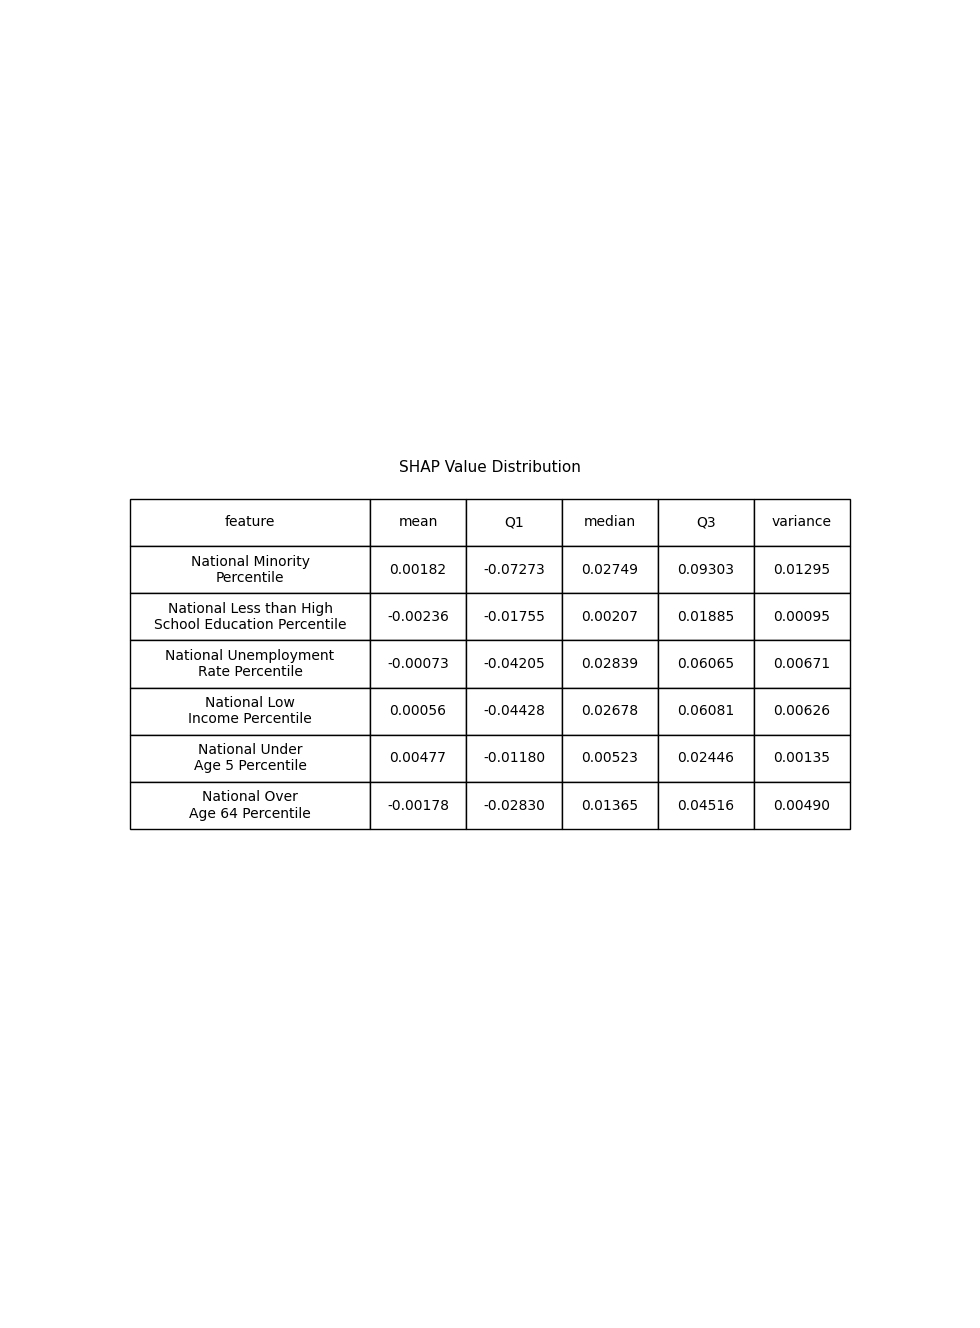

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

shap_dataframe = pd.read_csv('/preprocessing/shap_summaries.csv')

# Convert correlation_matrix DataFrame to a list of lists
shap_summary = shap_summaries[['mean', 'Q1', 'median', 'Q3','variance']]
data = shap_summary.reset_index().values.tolist()
formatted_data = []
for row in data:
    formatted_row = []
    for i, value in enumerate(row):
        if i == 0:  # Skip conversion and formatting for the first column
            formatted_row.append(value)
        else:
            formatted_value = f"{value:.5f}"
            formatted_row.append(formatted_value)
    formatted_data.append(formatted_row)


formatted_data[0][0] = 'National Minority\nPercentile'
formatted_data[1][0] = 'National Less than High\nSchool Education Percentile'
formatted_data[2][0] = 'National Unemployment\nRate Percentile'
formatted_data[4][0] = 'National Under\nAge 5 Percentile'
formatted_data[3][0] = 'National Low\nIncome Percentile'
formatted_data[5][0] = 'National Over\nAge 64 Percentile'

# Generate the table as a string using tabulate
table_string = tabulate(formatted_data, headers=correlation_matrix.columns, tablefmt="fancy_grid")

# Save table as a PNG image with taller rows
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')

# Create the table
table = ax.table(
    cellText=formatted_data,
    colLabels=['feature', 'mean', 'Q1', 'median', 'Q3','variance'],
    loc='center',
    cellLoc='center',
    colWidths = [0.25, 0.1, 0.1, 0.1, 0.1, 0.1]
)
table.scale(1, 2)  # Increase row height
table.set_fontsize(12)
table_title = 'SHAP Value Distribution'
table_title_text = ax.text(0.5, 0.65, table_title, ha='center', va='center', fontsize=11, transform=ax.transAxes)

# # Add a title to the table

# # Adjust the spacing

plt.subplots_adjust(left=0.1, top=1.2)

# Display the table
plt.draw()

output_file = 'analysis4/SHAP_Distribution.png'
plt.savefig(output_file)

In [ ]:
# def plot_multi_decision_tree(shap_array, X_value, skip_int):
#     test_shap = shap_array[1::skip_int]
#     test_X = np.array(X)[1::skip_int]
#     shap.multioutput_decision_plot(test_X, test_shap)
# plot_multi_decision_tree(X, shap_values[1], 100)

In [ ]:
# plot_decision_tree(explainer.expected_value[1], shap_values[1], X, 100)

In [ ]:
# shap.dependence_plot(0, shap_values=shap_values[1], features=X)

In [ ]:
shap_summaries = shap_summaries[['mean', 'median', 'variance']]

SHAP regression plots

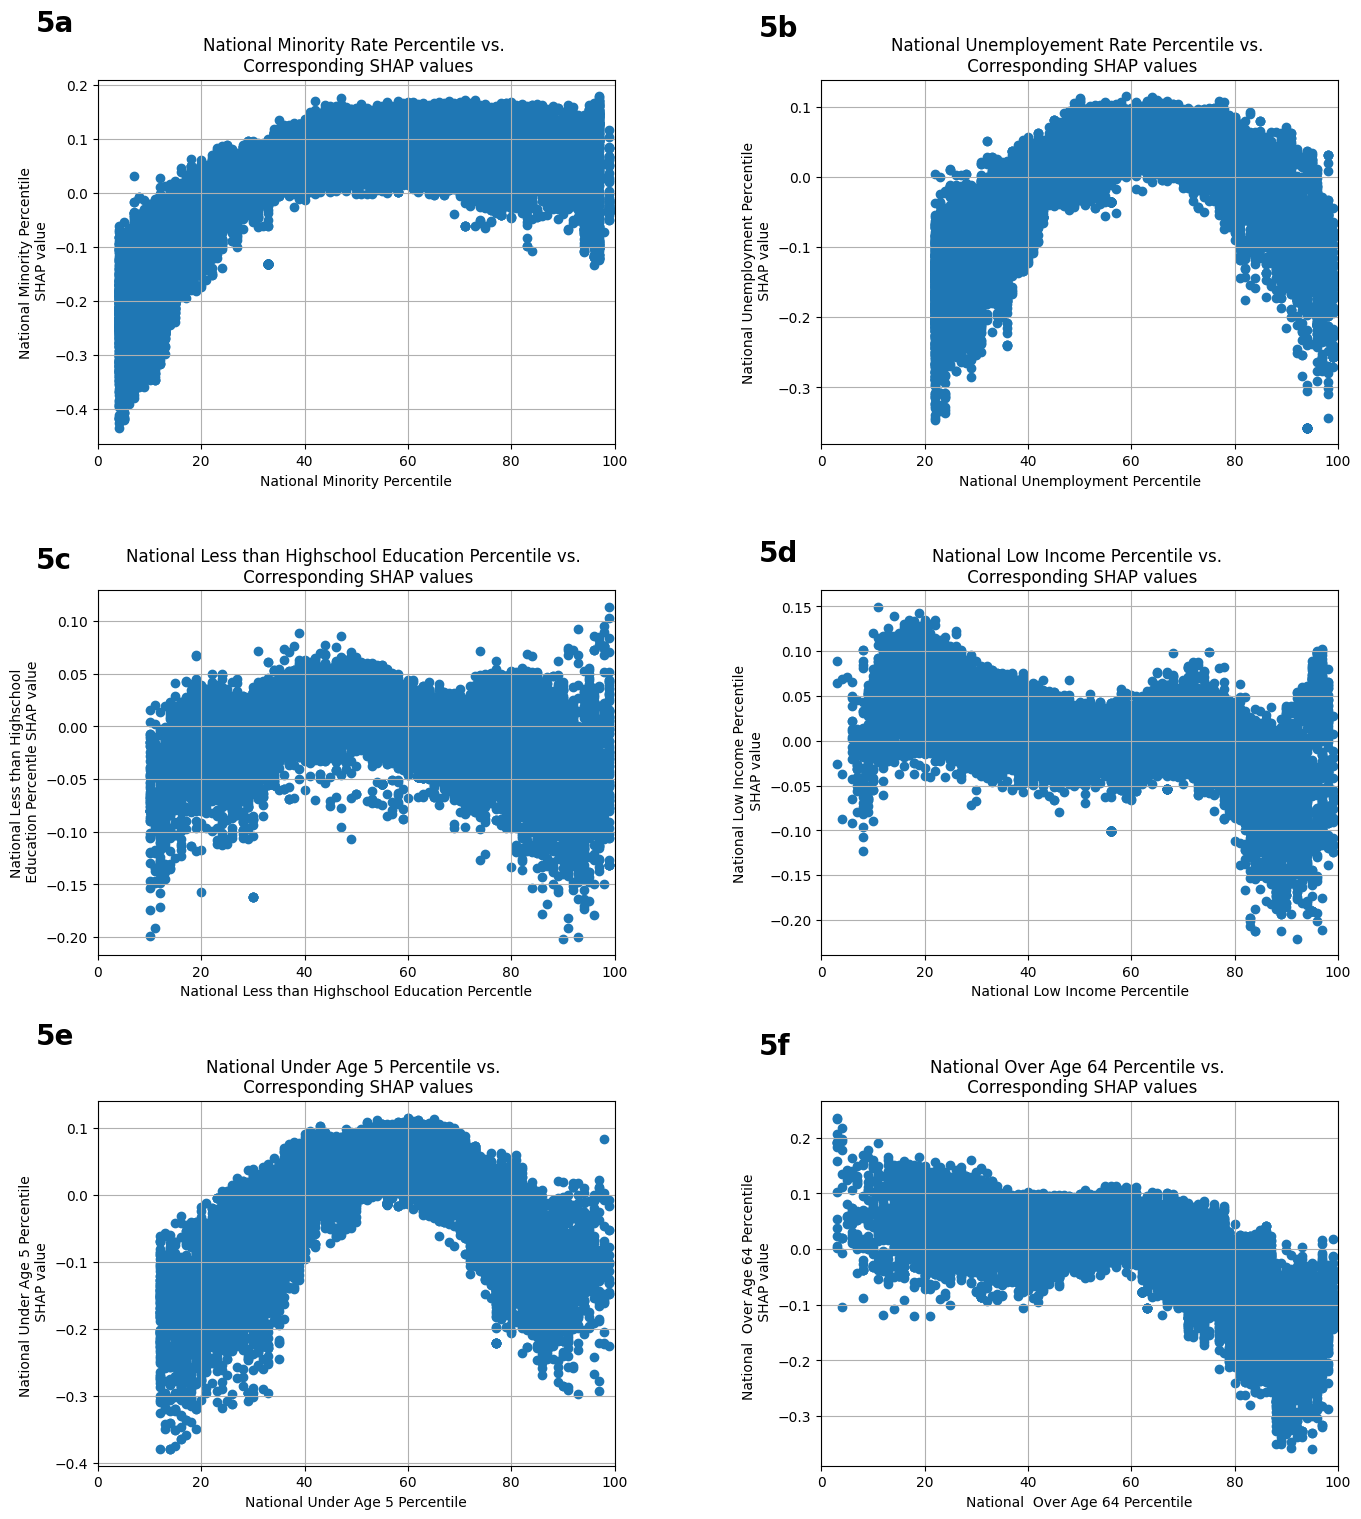

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.inspection import PartialDependenceDisplay

# Load data from the CSV file
shap_data = pd.read_csv("/preprocessing/PFAS_SHAP_Data.csv")

def fit_and_calculate_r2(x_data, y_data, func):
    popt, _ = curve_fit(func, x_data, y_data, maxfev=5000)
    y_fit = func(x_data, *popt)
    residuals = y_data - y_fit
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared, popt

kw_list = ["MINOR", "UNEMPLOYED", "LESSHS", "INCOME", "UNDER5", "OVER64"]

# Define functions for each equation

def exponential_func(x, a, b, c):
    return a * b ** x + c

def linear_func(x, a, b):
    return a * x + b

def quadratic_func(x, a, b, c):
    return a * x ** 2 + b * x + c

def cubic_func(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

def degree4_func(x, a, b, c, d, e):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

def degree5_func(x, a, b, c, d, e, f):
    return a * x ** 5 + b * x ** 4 + c * x ** 3 + d * x ** 2 + e * x + f

# Define functions for 6th to 10th degree polynomials
def degree6_func(x, a, b, c, d, e, f, g):
    return a * x ** 6 + b * x ** 5 + c * x ** 4 + d * x ** 3 + e * x ** 2 + f * x + g

def degree7_func(x, a, b, c, d, e, f, g, h):
    return a * x ** 7 + b * x ** 6 + c * x ** 5 + d * x ** 4 + e * x ** 3 + f * x ** 2 + g * x + h

def degree8_func(x, a, b, c, d, e, f, g, h, i):
    return a * x ** 8 + b * x ** 7 + c * x ** 6 + d * x ** 5 + e * x ** 4 + f * x ** 3 + g * x ** 2 + h * x + i

def degree9_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x ** 9 + b * x ** 8 + c * x ** 7 + d * x ** 6 + e * x ** 5 + f * x ** 4 + g * x ** 3 + h * x ** 2 + i * x + j

def degree10_func(x, a, b, c, d, e, f, g, h, i, j, k):
    return a * x ** 10 + b * x ** 9 + c * x ** 8 + d * x ** 7 + e * x ** 6 + f * x ** 5 + g * x ** 4 + h * x ** 3 + i * x ** 2 + j * x + k


# ... (same as before)

equations = [exponential_func, linear_func, quadratic_func, cubic_func, degree4_func, degree5_func,
             degree6_func, degree7_func, degree8_func, degree9_func, degree10_func
             ]

equation_names = ["Exponential", "Linear", "Quadratic", "Cubic", "Degree 4", "Degree 5"
                , "Degree 6", "Degree 7", "Degree 8", "Degree 9", "Degree 10"
                  ]

# Loop through the features and create subplots for each
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

for feature_idx, (feature_kw, ax) in enumerate(zip(kw_list, axes.flatten())):
    feature_col = f"N_D_{feature_kw}_PER"
    shap_col = f"SHAP_N_D_{feature_kw}_PER"

    # Extract x and y data from the DataFrame
    x_data = shap_data[feature_col]
    y_data = shap_data[shap_col]

    mask = x_data > 0
    x_data = x_data[mask]
    y_data = y_data[mask]



    # r_squared_values = []
    # best_equation_index = None
    # best_popt = None

    # for eq_func, eq_name in zip(equations, equation_names):
    #     r_squared, popt = fit_and_calculate_r2(x_data, y_data, eq_func)
    #     r_squared_values.append(r_squared)
    #     if best_popt is None or r_squared > r_squared_values[best_equation_index]:
    #         best_popt = popt
    #         best_equation_index = len(r_squared_values) - 1
    #     print(f"{eq_name} R^2 value: {r_squared}")

    # Find the equation with the highest R^2 value
    # best_equation = equation_names[best_equation_index]
    # highest_r_squared = r_squared_values[best_equation_index]
    # print(f"\nThe equation with the highest R^2 value is: {best_equation}")
    # print(f"Highest R^2 value: {highest_r_squared:.3f}")

    # Plot the best fit equation in red
    # best_fit_function = equations[best_equation_index]
    ax.scatter(x_data, y_data, label='Data')
    # x_fit = np.linspace(min(x_data), max(x_data), 100)
    # y_fit = best_fit_function(x_fit, *best_popt)
    # ax.plot(x_fit, y_fit, label=f"Best Fit ({best_equation})", color='red')

    ax.set_xlim(0, 100)

    ax.set_xlabel(feature_col)
    ax.set_ylabel(shap_col)
    ax.set_title(f"{feature_col} vs. {shap_col}")

    # Annotate the graph with the equation text at the bottom


    # ax.legend()
    ax.grid(True)


    if feature_kw == "MINOR":
        ax.set_title("National Minority Rate Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National Minority Percentile")
        ax.set_ylabel("National Minority Percentile\n SHAP value")
        ax.text(-12, 0.3, '5a', fontsize=20, fontweight='bold')

    elif feature_kw == "UNEMPLOYED":
        ax.set_title("National Unemployement Rate Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National Unemployment Percentile")
        ax.set_ylabel("National Unemployment Percentile\n SHAP value")
        ax.text(-12, 0.2, '5b', fontsize=20, fontweight='bold')

    elif feature_kw == "UNDER5":
        ax.set_title("National Under Age 5 Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National Under Age 5 Percentile")
        ax.set_ylabel("National Under Age 5 Percentile \n SHAP value")
        ax.text(-12, 0.225, '5e', fontsize=20, fontweight='bold')


    elif feature_kw == "OVER64":
        ax.set_title("National Over Age 64 Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National  Over Age 64 Percentile")
        ax.set_ylabel("National  Over Age 64 Percentile \n SHAP value")
        ax.text(-12, 0.35, '5f', fontsize=20, fontweight='bold')


    elif feature_kw == "INCOME":
        ax.set_title("National Low Income Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National Low Income Percentile")
        ax.set_ylabel("National Low Income Percentile\n SHAP value")
        ax.text(-12, 0.2, '5d', fontsize=20, fontweight='bold')


    elif feature_kw == "LESSHS":
        ax.set_title("National Less than Highschool Education Percentile vs. \n Corresponding SHAP values")
        ax.set_xlabel("National Less than Highschool Education Percentle")
        ax.set_ylabel("National Less than Highschool\n Education Percentle SHAP value")
        ax.text(-12, 0.15, '5c', fontsize=20, fontweight='bold')



# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Save the plot
plt.savefig("/analysis4/Polynomial_Regression_Plots_Grid.png")

# Show the plots
plt.show()
